# Unsupervised Classification Analysis
## 04 - compare unsupervised models to supervised model and target variables
### Marc Boulet
### Team Transparency, CSE 6242 Spring 2020


Compare final results between kmeans unsupervised classification and supervised linear regression. **data_analysis_final_results.csv** contains these attributes:

1) *country_iso* (country code)  
2) *unsup_all_3clusters* (3 cluster unsupervised classification using all attributes)  
3) *unsup_economic_3clusters* (3 cluster unsupervised classification using economic attributes)  
4) *unsup_creative_3clusters* (3 cluster unsupervised classification using creative attributes)  
5) *global_innovation_index* (target variable)  
6) *global_innovation_index_3clusters* (target variable converted to 3 clusters)  
7) *gii_innovation_output* (target variable)  
8) *gii_innovation_output_3clusters* (target variable converted to 3 clusters)  
9) *supervised_predication* (linear regression done by Riccardo)  
10) *supervised_predication_3clusters* (linear regression done by Riccardo converted to 3 clusters)  

The 3 clusters are distributed as follows:  
Cluster #2: high innovation  
Cluster #1: medium innovation  
Cluster #0: low innovation

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

### Load final data

In [4]:
# load final data
df_final_results = pd.read_csv('data_analysis_final_results.csv')
df_final_results.head()

,country_iso,unsup_all_3clusters,unsup_economic_3clusters,unsup_creative_3clusters,global_innovation_index,global_innovation_index_3clusters,gii_innovation_output,gii_innovation_output_3clusters,supervised_prediction,supervised_prediction_3clusters
0,ABW,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,1,1,0,30.3,1.0,18.3,0.0,21.008432,1.0
4,AND,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN


### Plot unsupervised models to target variables and linear regression

In [2]:
def plot_clusters3(dataframe, target):
    # pivot dataframe from wide to long
    df = pd.melt(dataframe, id_vars=[target], value_vars=['unsup_all_3clusters', 'unsup_economic_3clusters', 'unsup_creative_3clusters'], var_name = "cluster_type", value_name = "cluster_value")
    
    # plot dataframe in cluster_size facet grid (small multiples)
    g = sns.FacetGrid(df, col="cluster_type", col_wrap=3, height=3)
    g = g.map(sns.lineplot, target, "cluster_value", marker = ".")

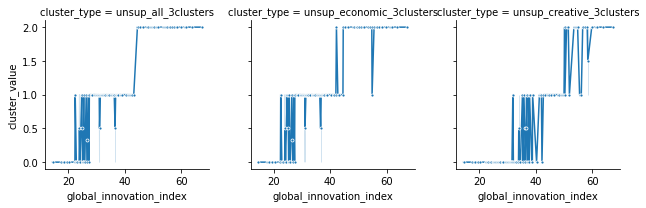

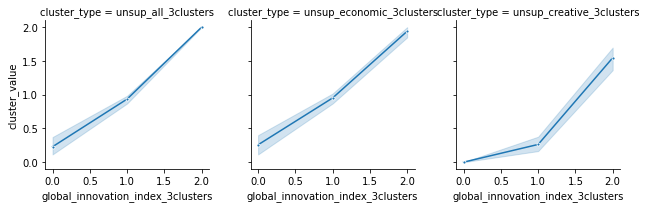

In [5]:
plot_clusters3(df_final_results, 'global_innovation_index')
plot_clusters3(df_final_results, 'global_innovation_index_3clusters')

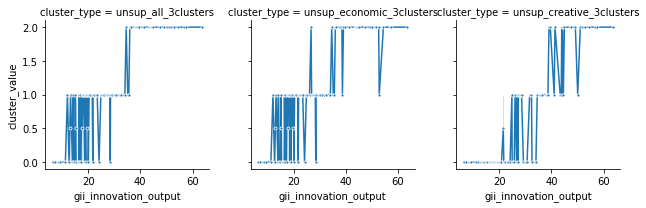

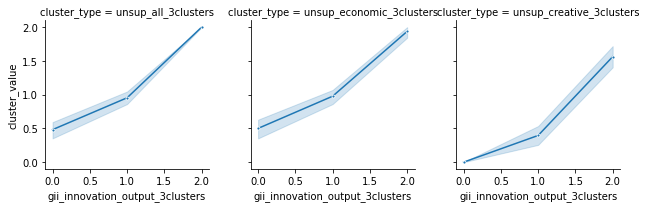

In [7]:
plot_clusters3(df_final_results, 'gii_innovation_output')
plot_clusters3(df_final_results, 'gii_innovation_output_3clusters')

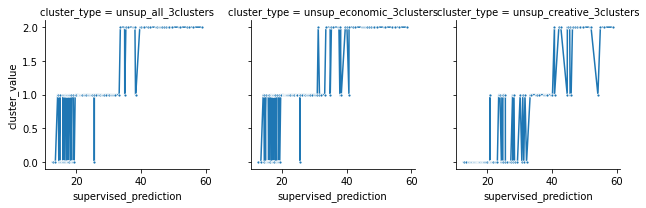

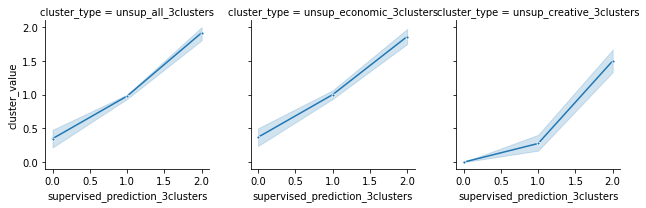

In [8]:
plot_clusters3(df_final_results, 'supervised_prediction')
plot_clusters3(df_final_results, 'supervised_prediction_3clusters')

### Compared supervised regression to target variables

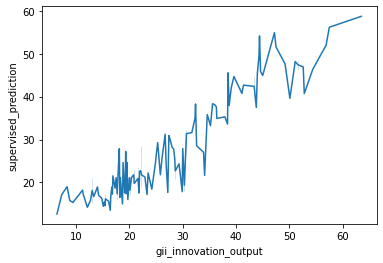

In [10]:
sns.lineplot(x = 'gii_innovation_output', y = 'supervised_prediction', data= df_final_results)

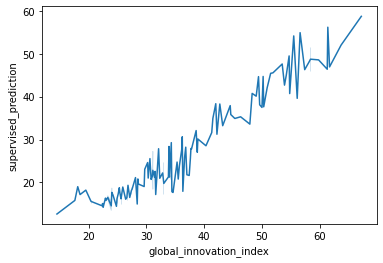

In [11]:
sns.lineplot(x = 'global_innovation_index', y = 'supervised_prediction', data= df_final_results)

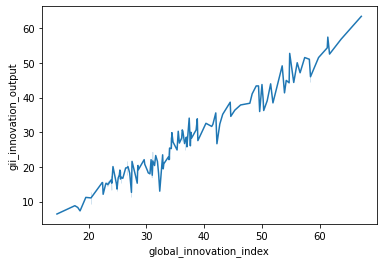

In [12]:
sns.lineplot(x = 'global_innovation_index', y = 'gii_innovation_output', data= df_final_results)